In [1]:
#Necessary Imports
import os
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf

import keras

from tensorflow import keras
from tensorflow.keras import layers
tf.compat.v1.enable_eager_execution()

import nibabel as nib

from scipy import ndimage

In [2]:
#Functions
def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    #print(scan)
    
    # Get raw data
    scan = scan.get_fdata()
#     show_slices([scan[100, :, :],
#              scan[:, 120, :],
#              scan[:, :, 100]])
#     print(np.min(scan))
#     print(np.max(scan))
#     print(scan.shape)
    return scan


def normalize(volume):
    """Normalize the volume"""
#     min = -1000
#     max = 400
#     volume[volume < min] = min
#     volume[volume > max] = max
#     volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
#     print(volume)
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
#     print(img)
#     print(np.min(img))
#     print(np.max(img))
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    return volume


In [3]:
dt = pd.read_csv("F:\Dataset\metaData.csv")
type1=[]
type2=[]
type3=[]
type4=[]
type5=[]
for i in range(len(dt.head(300))):
    if (dt.iloc[i]['TypeOfTB']==1):
        type1.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==2):
        type2.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==3):
        type3.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==4):
        type4.append(dt.iloc[i]['FileName'])
    if (dt.iloc[i]['TypeOfTB']==5):
        type5.append(dt.iloc[i]['FileName'])
print(type3)
print(len(type3))


['TRN_0077.nii.gz', 'TRN_0228.nii.gz']
2


In [4]:
i=0
type2paths=[]
type1paths=[]
type3paths=[]
type4paths=[]
type5paths=[]


for i in range(len(type1)):
    temptype1="F:\Dataset\\Train\\"+type1[i]
    type1paths.append(temptype1)
for i in range(len(type2)):
    temptype2="F:\Dataset\\Train\\"+type2[i]
    type2paths.append(temptype2)
for i in range(len(type3)):
    temptype3="F:\Dataset\\Train\\"+type3[i]
    type3paths.append(temptype3)
for i in range(len(type4)):
    temptype4="F:\Dataset\\Train\\"+type4[i]
    type4paths.append(temptype4)
for i in range(len(type5)):
    temptype5="F:\Dataset\\Train\\"+type5[i]
    type5paths.append(temptype5)

print(type2paths)

['F:\\Dataset\\Train\\TRN_0017.nii.gz', 'F:\\Dataset\\Train\\TRN_0028.nii.gz', 'F:\\Dataset\\Train\\TRN_0038.nii.gz', 'F:\\Dataset\\Train\\TRN_0050.nii.gz', 'F:\\Dataset\\Train\\TRN_0070.nii.gz', 'F:\\Dataset\\Train\\TRN_0088.nii.gz', 'F:\\Dataset\\Train\\TRN_0091.nii.gz', 'F:\\Dataset\\Train\\TRN_0092.nii.gz', 'F:\\Dataset\\Train\\TRN_0094.nii.gz', 'F:\\Dataset\\Train\\TRN_0116.nii.gz', 'F:\\Dataset\\Train\\TRN_0137.nii.gz', 'F:\\Dataset\\Train\\TRN_0139.nii.gz', 'F:\\Dataset\\Train\\TRN_0146.nii.gz', 'F:\\Dataset\\Train\\TRN_0150.nii.gz', 'F:\\Dataset\\Train\\TRN_0156.nii.gz', 'F:\\Dataset\\Train\\TRN_0242.nii.gz']


In [5]:
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_one_scans=np.array([process_scan(path) for path in type1paths])
  
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_two_scans=np.array([process_scan(path) for path in type2paths])
 
#path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_three_scans=np.array([process_scan(path) for path in type3paths])

# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_four_scans=np.array([process_scan(path) for path in type4paths])
   
# #path="E:\\TuberculosisTypeClassification\\test_scans\\"+str(temp_all_path[i])
type_five_scans=np.array([process_scan(path) for path in type5paths])
        

In [6]:
type_one = round(0.7 * len(type_one_scans))
type_two = round(0.7 * len(type_two_scans))
type_three = round(0.7 * len(type_three_scans))
type_four = round(0.7 * len(type_four_scans))
type_five = round(0.7 * len(type_five_scans))
print(type_four)

15


In [7]:
type_one_labels = np.array([0 for _ in range(len(type_one_scans))])
type_two_labels = np.array([1 for _ in range(len(type_two_scans))])
type_three_labels = np.array([2 for _ in range(len(type_three_scans))])
type_four_labels = np.array([3 for _ in range(len(type_four_scans))])
type_five_labels = np.array([4 for _ in range(len(type_five_scans))])

# #Split data for training and validation into 70-30.
x_train = np.concatenate((type_one_scans[:type_one], type_two_scans[:type_two],type_three_scans[:1], type_four_scans[:type_four],type_five_scans[:type_five]) , axis = 0)
y_train = np.concatenate((type_one_labels[:type_one], type_two_labels[:type_two],type_three_labels[:1], type_four_labels[:type_four],type_five_labels[:type_five]), axis = 0)


x_val =np.concatenate((type_one_scans[type_one:], type_two_scans[type_two:],type_three_scans[type_three:], type_four_scans[type_four:],type_five_scans[type_five:]) , axis = 0)
y_val = np.concatenate((type_one_labels[type_one:], type_two_labels[type_two:],type_three_labels[type_three:], type_four_labels[type_four:],type_five_labels[type_five:]), axis = 0)


print(
    "Number of samples in train and validation are %d and %d."
    % (x_train.shape[0], x_val.shape[0])
)
#print(len(x_train))
#print(len(y_train))
print(x_train)
print(np.min(x_train))
print(np.max(x_train))
#print(y_train)

Number of samples in train and validation are 210 and 90.
[[[[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [    0.     0.     0. ...     0.     0.     0.]
   [    0.     0.     0. ...     0.     0.     0.]
   [    0.     0.     0. ...     0.     0.     0.]]

  [[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]]

  [[    0.     0.     0. ...     0.     0.     0.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   ...
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]
   [-3024. -3024. -3024. ... -3024. -3024. -3024.]

In [8]:
import random

from scipy import ndimage


@tf.function
def rotate(volume):
    """Rotate the volume by a few degrees"""

    def scipy_rotate(volume):
        # define some rotation angles
        angles = [-20, -10, -5, 5, 10, 20]
        # pick angles at random
        angle = random.choice(angles)
        # rotate volume
        volume = ndimage.rotate(volume, angle, reshape=False)
        volume[volume < 0] = 0
        volume[volume > 1] = 1
        return volume

    augmented_volume = tf.numpy_function(scipy_rotate, [volume], tf.float32)
    return augmented_volume


def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = rotate(volume)
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label


#### Augmentation

In [9]:
# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_val, y_val))

batch_size = 2
# Augment the on the fly during training.
train_dataset = (
    train_loader.shuffle(len(x_train))
    .map(train_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)

# Only rescale.
validation_dataset = (
    validation_loader.shuffle(len(x_val))
    .map(validation_preprocessing)
    .batch(batch_size)
    .prefetch(2)
)
print(train_dataset)
print(len(validation_loader))

<PrefetchDataset shapes: (<unknown>, (None,)), types: (tf.float32, tf.int32)>
90


Dimension of the CT scan 1 is: (512, 512, 126)


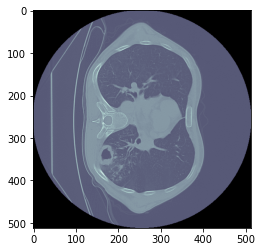

In [10]:
import matplotlib.pyplot as plt

# #for i in range (1,5):
# data = train_dataset.take(1)
# images, labels = list(data)[0]
# images = images.numpy()
# image = images[0]


image = nib.load("F:\Dataset\Train\TRN_0036.nii.gz")
image = image.get_fdata()

print("Dimension of the CT scan",1,"is:", image.shape)
plt.imshow(np.squeeze(image[:, :, 63]),cmap=plt.cm.bone)



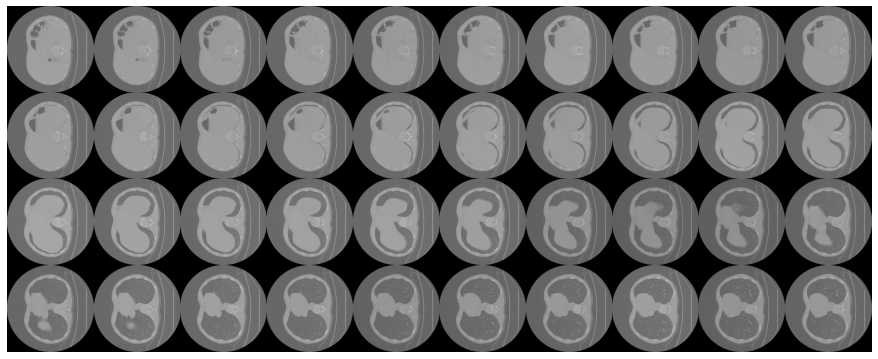

In [12]:
def plot_slices(num_rows, num_columns, width, height, data):
    """Plot a montage of 20 CT slices"""
    data = np.rot90(np.array(data))
    data = np.transpose(data)
    data = np.reshape(data, (num_rows, num_columns, width, height))
    rows_data, columns_data = data.shape[0], data.shape[1]
    heights = [slc[0].shape[0] for slc in data]
    widths = [slc.shape[1] for slc in data[0]]
    fig_width = 12.0
    fig_height = fig_width * sum(heights) / sum(widths)
    f, axarr = plt.subplots(
        rows_data,
        columns_data,
        figsize=(fig_width, fig_height),
        gridspec_kw={"height_ratios": heights},
    )
    for i in range(rows_data):
        for j in range(columns_data):
            axarr[i, j].imshow(data[i][j], cmap="gray")
            axarr[i, j].axis("off")
    plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    plt.show()


# Visualize montage of slices.
# 4 rows and 10 columns for 100 slices of the CT scan.
plot_slices(4, 10, 512, 512, image[:, :, :40])


In [ ]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="softmax")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="softmax")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=5, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()


In [13]:
def get_model(width=128, height=128, depth=64):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width, height, depth, 1))

    x = layers.Conv3D(filters=32, kernel_size=3, activation="relu", kernel_initializer='he_uniform')(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.5)(x)


    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu", kernel_initializer='he_uniform')(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization(center=True, scale=True)(x)
    x = layers.Dropout(0.5)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_uniform')(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_uniform')(x)

    outputs = layers.Dense(units=5, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model

# Build model.
model = get_model(width=128, height=128, depth=64)
model.summary()


Model: "3dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 64, 1)] 0         
_________________________________________________________________
conv3d (Conv3D)              (None, 126, 126, 62, 32)  896       
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 63, 63, 31, 32)    0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 31, 32)    128       
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 31, 32)    0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 61, 61, 29, 64)    55360     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 30, 30, 14, 64)    0     

In [23]:
initial_learning_rate = 0.00001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc"],
)

# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_classification.h5", save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)



In [24]:
# Train the model, doing validation at the end of each epoch
epochs = 20
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    shuffle=True,
    verbose=1,
    callbacks=[checkpoint_cb, early_stopping_cb],
)

Epoch 1/20
105/105 [==============================] - 27s 249ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 197179.7969 - val_acc: 0.0111
Epoch 2/20
 63/105 [=================>............] - ETA: 9s - loss: 0.0040 - acc: 1.0000 

KeyboardInterrupt: 

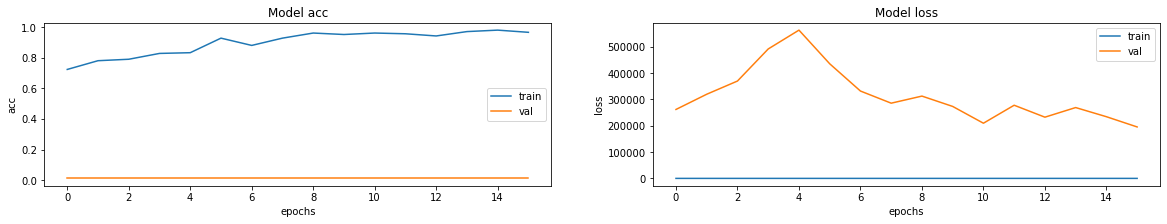

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["acc", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])


In [ ]:
# Load best weights.

model.load_weights("F:\Dataset\3d_image_classification.h5")

for i in range(len(x_val)):
    
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))
    #print(y_val[i])
    scores = prediction
    class_names=str(y_val[i])


    for score, name in zip(scores, class_names):
        print(score)
        print(
            "This model is %.2f percent confident that CT scan is %s"
            % ((100 * score), name)
        )

In [ ]:
model.load_weights("F:\Dataset\3d_image_classification.h5")

prediction = model.predict(np.expand_dims(x_val[2], axis=0))[0]
scores = [1 - prediction[0], prediction[0]]

class_names = ["1", "2", "3", "4", "5"]
for score, name in zip(scores, class_names):
    print(score)
    print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
    )

In [20]:
model.load_weights("3d_image_classification.h5")
for i in range (90):
    prediction = model.predict(np.expand_dims(x_val[i], axis=0))[0]
    scores = prediction
    print(scores)
    class_names = ["1", "2", "3", "4", "5"]
    for score, name in zip(scores, class_names):
        print(score)
        print(
        "This model is %.2f percent confident that CT scan is %s"
        % ((100 * score), name)
        )

[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident 

[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident 

[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident 

[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident that CT scan is 1
0.0
This model is 0.00 percent confident that CT scan is 2
1.0
This model is 100.00 percent confident that CT scan is 3
0.0
This model is 0.00 percent confident that CT scan is 4
0.0
This model is 0.00 percent confident that CT scan is 5
[0. 0. 1. 0. 0.]
0.0
This model is 0.00 percent confident 